# Term Project
## DSC530 - 303
## Madison Christiansen

In [219]:
import sys
import matplotlib
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import thinkplot
import random
import pandas as pd
import numpy as np

In [250]:
fishdata = pd.read_csv('/Users/madisonchristiansen/desktop/Fish.csv')

In [251]:
fishdata.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [106]:
num_fishdata = fishdata[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

## Histograms

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

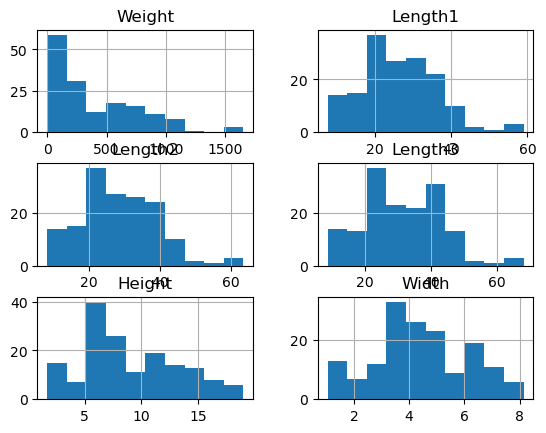

In [107]:
num_fishdata.hist()

array([[<AxesSubplot:title={'center':'Weight'}>]], dtype=object)

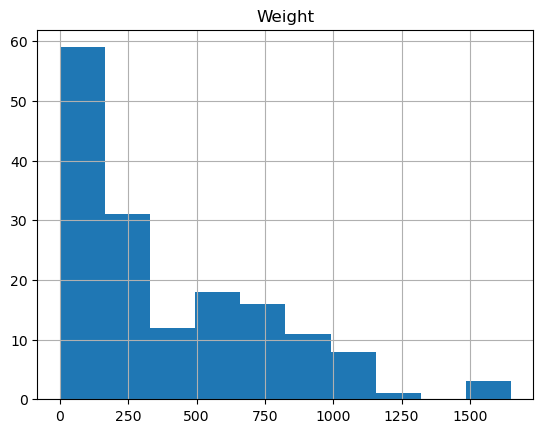

In [108]:
num_fishdata.hist(column='Weight')

array([[<AxesSubplot:title={'center':'Length1'}>]], dtype=object)

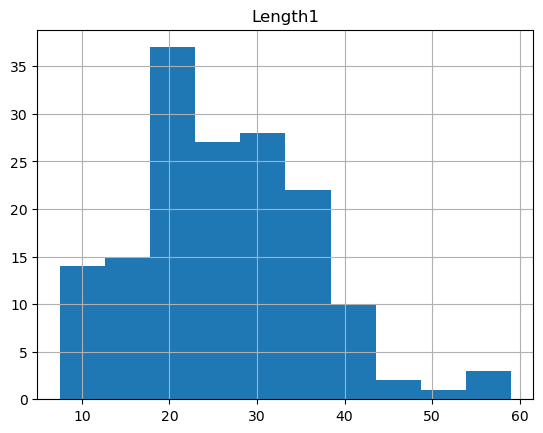

In [247]:
num_fishdata.hist(column='Length1')

array([[<AxesSubplot:title={'center':'Length2'}>]], dtype=object)

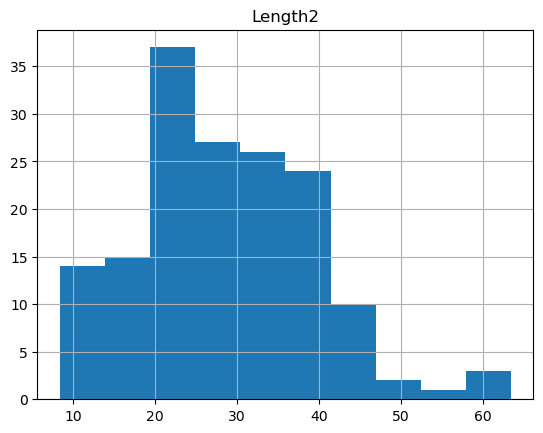

In [110]:
num_fishdata.hist(column='Length2')

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

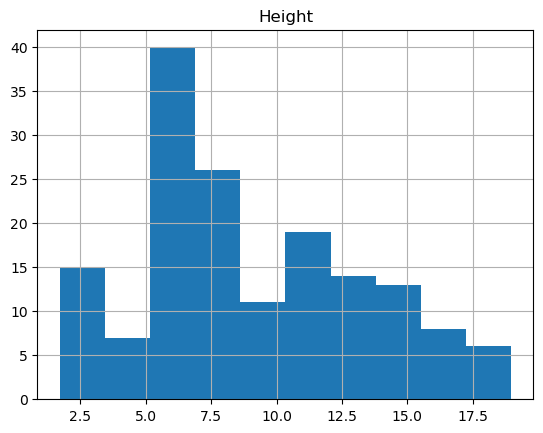

In [255]:
num_fishdata.hist(column='Height')

array([[<AxesSubplot:title={'center':'Width'}>]], dtype=object)

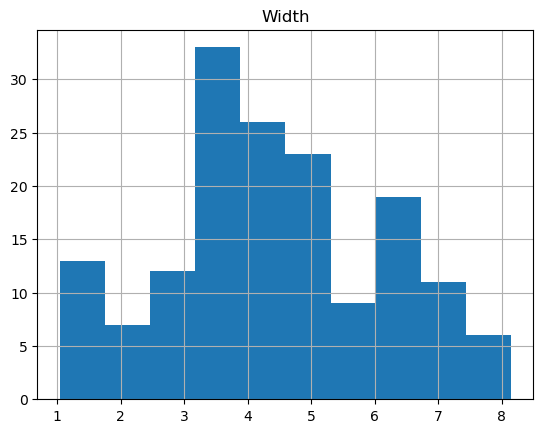

In [113]:
num_fishdata.hist(column='Width')

## Descriptive Characteristics

In [114]:
num_fishdata.mean()

Weight     398.326415
Length1     26.247170
Length2     28.415723
Length3     31.227044
Height       8.970994
Width        4.417486
dtype: float64

In [115]:
num_fishdata.mode()

,Weight,Length1,Length2,Length3,Height,Width
0,300.0,19.0,22.0,23.5,2.2139,3.525
1,NaN,NaN,NaN,NaN,5.6925,NaN
2,NaN,NaN,NaN,NaN,6.1100,NaN
3,NaN,NaN,NaN,NaN,9.6000,NaN
4,NaN,NaN,NaN,NaN,11.1366,NaN


In [116]:
num_fishdata.var()

Weight     128148.475121
Length1        99.928837
Length2       114.839688
Length3       134.797808
Height         18.371576
Width           2.841935
dtype: float64

In [117]:
num_fishdata.std()

Weight     357.978317
Length1      9.996441
Length2     10.716328
Length3     11.610246
Height       4.286208
Width        1.685804
dtype: float64

In [118]:
num_fishdata.quantile()

Weight     273.0000
Length1     25.2000
Length2     27.3000
Length3     29.4000
Height       7.7860
Width        4.2485
Name: 0.5, dtype: float64

## PMF

In [133]:
import thinkstats2
pmf = thinkstats2.Pmf(num_fishdata)
pmf


Pmf({'Weight': 0.16666666666666666, 'Length1': 0.16666666666666666, 'Length2': 0.16666666666666666, 'Length3': 0.16666666666666666, 'Height': 0.16666666666666666, 'Width': 0.16666666666666666})

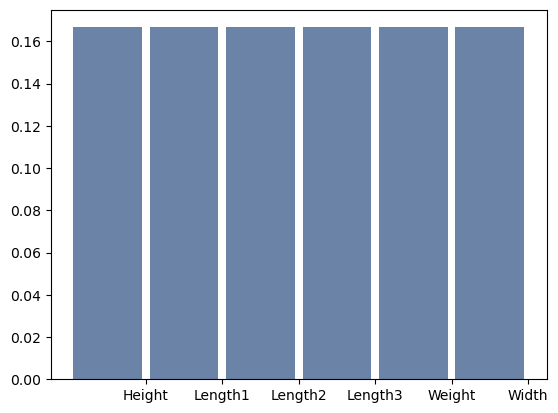

In [129]:
thinkplot.Hist(pmf)

## CDF

In [137]:
cdf = thinkstats2.Cdf(num_fishdata.Weight, label='Weight')

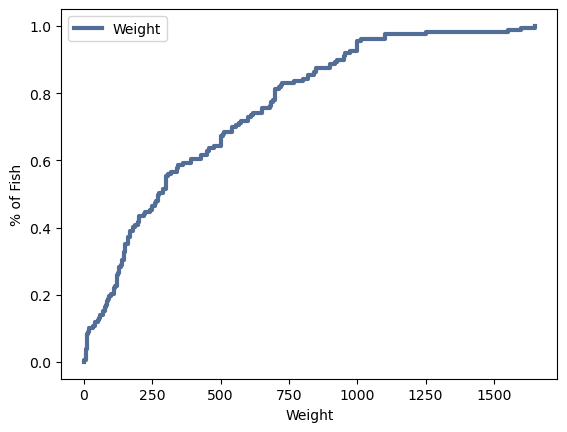

<Figure size 800x600 with 0 Axes>

In [262]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Weight', ylabel="% of Fish")

## Analytical Distribution

In [215]:
weights = num_fishdata.Weight.dropna()

def MakeNormalModel(weights):
    cdf = thinkstats2.Cdf(weights, label="Weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 159 392.89108280254777 343.43219087528877


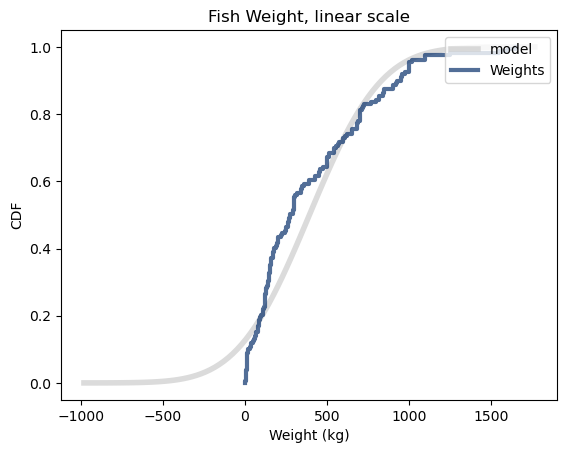

In [218]:
MakeNormalModel(weights)
thinkplot.Config(title="Fish Weight, linear scale", xlabel="Weight (kg)", ylabel="CDF", loc="upper right")

## Scatter Plots

In [180]:
weight = num_fishdata.Weight
height = num_fishdata.Height
width = num_fishdata.Width

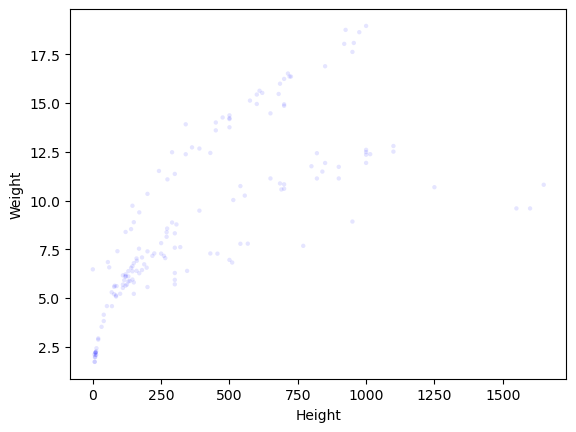

In [245]:
thinkplot.Scatter(weight, height, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height',
                ylabel='Weight')

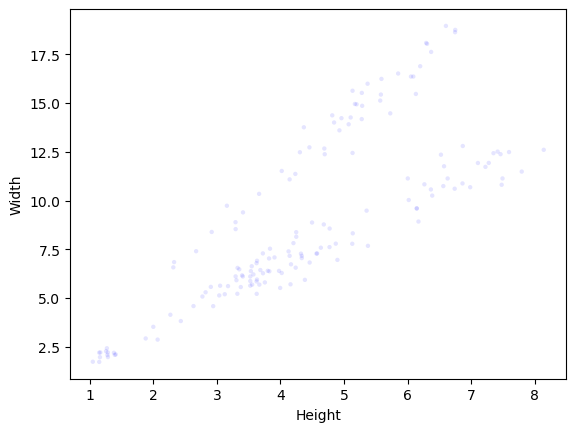

In [229]:
thinkplot.Scatter(width, height, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height',
                ylabel='Width')

## Chapter 9 Test - Permutation test

In [230]:
Weight = num_fishdata['Weight']
Length2 = num_fishdata['Length2']

In [236]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        Weight, Length2 = data
        test_stat = abs(Weight.mean() - Length2.mean())
        return test_stat

    def MakeModel(self):
        Weight, Length2 = self.data
        self.n, self.m = len(Weight), len(Length2)
        self.pool = np.hstack((Weight, Length2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [237]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.069

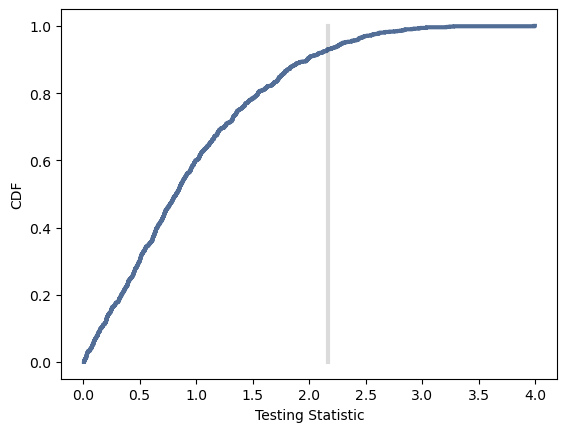

In [238]:
ht.PlotCdf()
thinkplot.Config(xlabel='Testing Statistic',
                   ylabel='CDF')

## Regression Analysis

In [209]:
import statsmodels.formula.api as smf

In [263]:
formula = 'Weight ~ Height + Width'
results = smf.ols(formula, data=num_fishdata).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     288.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           3.91e-53
Time:                        11:03:50   Log-Likelihood:                -1037.1
No. Observations:                 159   AIC:                             2080.
Df Residuals:                     156   BIC:                             2089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -433.5757     37.075    -11.694      0.000    -506.810    -360.342
Height         4.8246      5.063      0.953      0.342      -5.176      14.825
Width        178.5225     12.872     13.869      0.000     153.096     203.949
==============================================================================
Omnibus:                      106.580   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.211
Skew:                           2.449   Prob(JB):                    3.37e-163
Kurtosis:                      12.431   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""